# Task 7: Conceptual Questions

1. What is the difference between Bagging and Boosting?
Bagging trains many models in parallel and then combines their output (like voting or averaging). Boosting trains models one after another, each new model tries to fix errors made by the previous one.
Bagging mainly reduces variance, boosting reduces bias.

2. How does Random Forest reduce variance?
Random Forest is like bagging with decision trees. It trains many trees on random subsets of data and features, so all trees are different.
By averaging their results, it reduces variance and makes the final prediction more stable and not too sensitive to noise.

3. What is the weakness of boosting-based methods?
Boosting can easily overfit if not controlled properly, especially if the model becomes too complex.
Also it's slower than bagging because models train one after another, not together.

/tmp/ipython-input-66875175.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-66875175.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-66875175.py:14: FutureWarning: A value is trying to be set on a co

Decision Tree - Accuracy: 0.770949720670391 Precision: 0.726027397260274 Recall: 0.7162162162162162
Random Forest - Accuracy: 0.7988826815642458 Precision: 0.7638888888888888 Recall: 0.7432432432432432


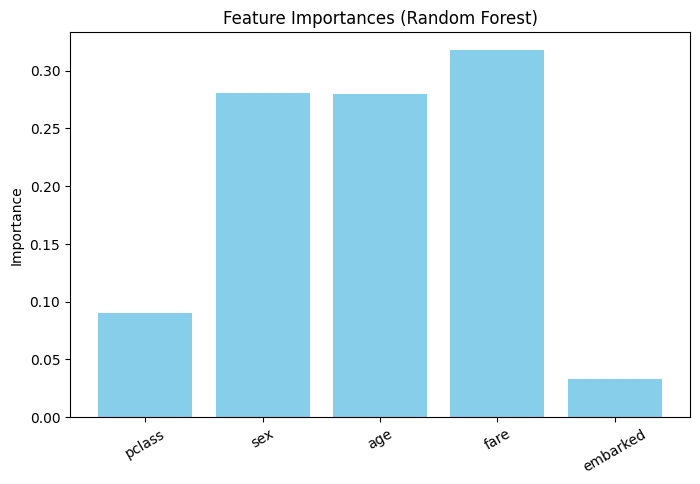

In [3]:
# Task 8: Random Forest vs Decision Tree
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# load Titanic dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encode categorical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# metrics for decision tree
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)

# metrics for random forest
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)

print("Decision Tree - Accuracy:", dt_acc, "Precision:", dt_prec, "Recall:", dt_rec)
print("Random Forest - Accuracy:", rf_acc, "Precision:", rf_prec, "Recall:", rf_rec)

# feature importance plot (random forest)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.bar(features, importances, color='skyblue')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xticks(rotation=30)
plt.show()


In [4]:
# Task 9: AdaBoost or Gradient Boosting

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# load Titanic dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encode
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# adaboost
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)

# metrics
dt_acc = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

ab_acc = accuracy_score(y_test, ab_pred)
ab_f1 = f1_score(y_test, ab_pred)

print("Decision Tree - Accuracy:", dt_acc, "F1:", dt_f1)
print("Random Forest - Accuracy:", rf_acc, "F1:", rf_f1)
print("AdaBoost - Accuracy:", ab_acc, "F1:", ab_f1)


/tmp/ipython-input-1178721388.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-1178721388.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Decision Tree - Accuracy: 0.776536312849162 F1: 0.7297297297297297
Random Forest - Accuracy: 0.7988826815642458 F1: 0.7428571428571429
AdaBoost - Accuracy: 0.7988826815642458 F1: 0.75
